In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import os

from voc12 import dataloader
from voc12.dataloader import TorchvisionNormalize
import torch

In [3]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (50,5)

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach().type(torch.uint8)
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [5]:
temp_dir = '../temp/notebook'
voc12_root = '../../vision/data/raw/VOCdevkit/VOC2012'
label_dir = '../../vision/data/raw/VOCdevkit/VOC2012/SegmentationClass'
train_list = '../voc12/dev.txt'
val_list = '../voc12/dev.txt'
cls_label_path = '../voc12/cls_labels.npy'
crop_size =  512

In [6]:
os.makedirs(temp_dir, exist_ok=True)

In [7]:
ds1 = dataloader.VOC12PseudoSegmentationDataset(
    train_list,
    crop_size=crop_size,
    voc12_root=voc12_root,
    rescale=None,
    hor_flip=True,
    crop_method="random",
    #img_normal=None,
    resize_long=(crop_size, crop_size * 2),
    temp_dir=temp_dir,
)

In [8]:
item = ds1[0]
img = torch.from_numpy(item['img'])
img.shape

torch.Size([3, 512, 512])

In [9]:
img.dtype

torch.float32

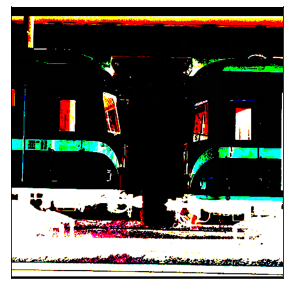

In [10]:
show(img)

In [11]:
from voc12 import dataloader_2
from torchvision import transforms
from voc12.dataloader_2 import random_resize_long

In [12]:
transform = transforms.Compose(
     [   transforms.PILToTensor(),
         transforms.Lambda(lambda x: random_resize_long(x, crop_size, crop_size * 2)),
         transforms.RandomHorizontalFlip(0.5),
         transforms.RandomAdjustSharpness(sharpness_factor=2),
         transforms.RandomAutocontrast(),
         transforms.RandomEqualize(),
         transforms.RandomResizedCrop(size=(crop_size, crop_size)),
         transforms.RandomRotation(degrees=(0, 45)),
         transforms.ConvertImageDtype(torch.float),
         transforms.RandomErasing(),
         transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
     ]
)

In [13]:
ds2 = dataloader_2.VOC12ImageDataset(
    train_list,
    voc12_root=voc12_root,
    transform=transform
)

In [14]:
item = ds2[0]
img = item['img']
img.shape

torch.Size([3, 512, 512])

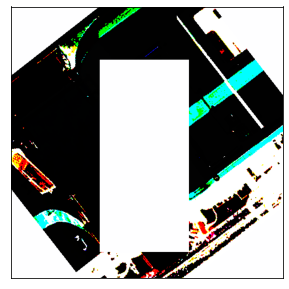

In [15]:
show(img)

In [16]:
from voc12 import custom_transforms
transform = transforms.Compose(
     [   custom_transforms.CustomPILToTensor(),
         transforms.Lambda(lambda x: custom_transforms.random_resize_long_tuple(x, crop_size, crop_size * 2)),
         custom_transforms.CustomRandomHorizontalFlip(0.5),
         custom_transforms.CustomRandomAdjustSharpness(sharpness_factor=2),
         custom_transforms.CustomRandomAutocontrast(),
         custom_transforms.CustomRandomEqualize(),
         custom_transforms.CustomRandomResizedCrop(size=(crop_size, crop_size)),
         custom_transforms.CustomRandomRotation(degrees=(0, 45)),
         custom_transforms.CustomConvertImageDtype(torch.float),
         custom_transforms.CustomRandomErasing(),
         custom_transforms.CustomNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
     ]
)

In [17]:
ds3 = dataloader_2.VOC12SegmentationDataset(
    train_list,
    label_dir=label_dir,
    voc12_root=voc12_root,
    transform=transform
)

In [18]:
item = ds3[0]
img = item['img']
mask = item['mask']
img.shape, mask.shape

(torch.Size([3, 512, 512]), torch.Size([1, 512, 512]))

In [19]:
img.dtype, img.unique()

(torch.float32,
 tensor([-2.1179, -2.1008, -2.0837, -2.0665, -2.0494, -2.0357, -2.0323, -2.0182,
         -2.0152, -2.0007, -1.9980, -1.9832, -1.9809, -1.9657, -1.9638, -1.9482,
         -1.9467, -1.9307, -1.9295, -1.9132, -1.9124, -1.8957, -1.8953, -1.8782,
         -1.8782, -1.8610, -1.8606, -1.8439, -1.8431, -1.8268, -1.8256, -1.8097,
         -1.8081, -1.8044, -1.7925, -1.7906, -1.7870, -1.7754, -1.7731, -1.7696,
         -1.7583, -1.7556, -1.7522, -1.7412, -1.7381, -1.7347, -1.7240, -1.7206,
         -1.7173, -1.7069, -1.7031, -1.6999, -1.6898, -1.6856, -1.6824, -1.6727,
         -1.6681, -1.6650, -1.6555, -1.6506, -1.6476, -1.6384, -1.6331, -1.6302,
         -1.6213, -1.6155, -1.6127, -1.6042, -1.5980, -1.5953, -1.5870, -1.5805,
         -1.5779, -1.5699, -1.5630, -1.5604, -1.5528, -1.5455, -1.5430, -1.5357,
         -1.5280, -1.5256, -1.5185, -1.5105, -1.5081, -1.5014, -1.4930, -1.4907,
         -1.4843, -1.4755, -1.4733, -1.4672, -1.4580, -1.4559, -1.4500, -1.4405,
         -1.

(None, None)

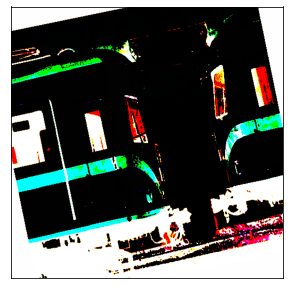

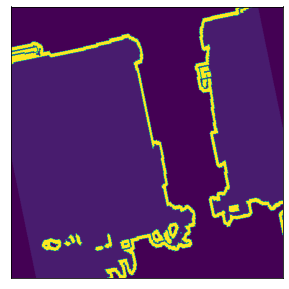

In [20]:
show(img), show(mask)

In [21]:
mask.unique()

tensor([  0,  19, 255], dtype=torch.uint8)

In [22]:
img

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [23]:
crop_size = 512
transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        transforms.Lambda(
            lambda x: custom_transforms.random_resize_long_tuple(
                x, crop_size, crop_size * 2
            )
        ),
        custom_transforms.CustomRandomHorizontalFlip(0.5),
        custom_transforms.CustomRandomAdjustSharpness(sharpness_factor=2),
        custom_transforms.CustomRandomAutocontrast(),
        custom_transforms.CustomRandomEqualize(),
        custom_transforms.CustomRandomResizedCrop(size=(crop_size, crop_size)),
        custom_transforms.CustomRandomRotation(degrees=(0, 45)),
        custom_transforms.CustomConvertImageDtype(torch.float),
        custom_transforms.CustomRandomErasing(),
        custom_transforms.CustomNormalize(
            mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        ),
    ]
)
ds4 = dataloader_2.VOC12PseudoSegmentationDataset(
    train_list,
    voc12_root=voc12_root,
    temp_dir="test",
    transform=transform,
)

In [24]:
item = ds4[0]
img = item['img']
mask = item['mask']
pseudo_mask = item['pseudo_mask']
img.shape, mask.shape, pseudo_mask.shape

(torch.Size([3, 512, 512]),
 torch.Size([1, 512, 512]),
 torch.Size([1, 512, 512]))

(None, None, None)

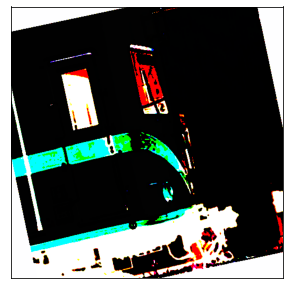

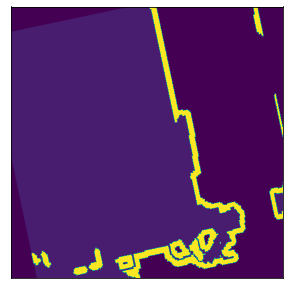

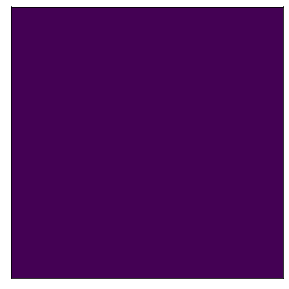

In [25]:
show(img), show(mask), show(pseudo_mask)

In [26]:
crop_size = 512
transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        custom_transforms.CustomConvertImageDtype(torch.float),
        custom_transforms.CustomNormalize(
            mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        ),
    ]
)
ds4 = dataloader_2.VOC12PseudoSegmentationDataset(
    train_list,
    voc12_root=voc12_root,
    temp_dir="test",
    transform=transform,
)

In [27]:
item = ds4[0]
img = item['img']
mask = item['mask']
pseudo_mask = item['pseudo_mask']
img.shape, mask.shape, pseudo_mask.shape

(torch.Size([3, 335, 500]),
 torch.Size([1, 335, 500]),
 torch.Size([1, 335, 500]))

In [28]:
transform = transforms.Compose(
    [
        custom_transforms.CustomPILToTensor(),
        custom_transforms.CustomCenterCrop(size=crop_size),
        
    ]
)
ds4 = dataloader_2.VOC12PseudoSegmentationDataset(
    train_list,
    voc12_root=voc12_root,
    transform=transform,
    temp_dir=temp_dir
)


In [29]:
item = ds4[0]
img = item['img']
label = item['label']
img, label.shape

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 torch.Size([20]))

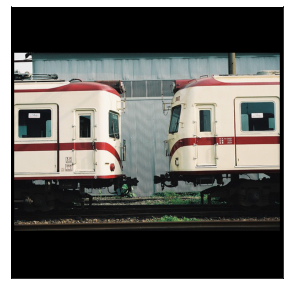

In [30]:
show(img)

In [31]:
img.shape

torch.Size([3, 512, 512])